In [1]:
import pandas as pd

df_train = pd.read_csv("Preliminary_dataset/train.csv")

汇总指标数，统计每个指标的数据集，统计当中正常的和异常的数据量

In [6]:
count = df_train["KPI ID"].nunique()
print(f"Number of unique KPI IDs: {count}")
df_train.groupby("KPI ID").size().reset_index(name='counts').sort_values(by='counts', ascending=False)

Number of unique KPI IDs: 26


,KPI ID,counts
11,7c189dd36f048a6c,147689
20,affb01ca2b4f0b45,147680
8,71595dd7171f4540,147668
23,cff6d3c01e6a6bfa,147629
25,e0770391decc44ce,147024
15,8c892e5525f3e491,147009
18,a40b1df87e3f1c87,137925
14,8bef9af9a922e0b3,129453
4,18fbb1d5a5dc099d,129128
24,da403e4e3f87c9e0,129035


统计数据基本特征

In [10]:
name_dfs = df_train.groupby("KPI ID")
names, v_mean, v_max, v_min, v_std, v_sum, v_size = [], [], [], [], [], [], []
lable_normal, lable_anomaly = [], []
for name, df in name_dfs:
    names.append(name)
    v_mean.append(df["value"].mean())
    v_max.append(df["value"].max())    
    v_min.append(df["value"].min())    
    v_std.append(df["value"].std())
    v_sum.append(df["value"].sum())
    lable_normal.append((df["label"] == 0).sum())
    lable_anomaly.append((df["label"] == 1).sum())
    v_size.append(df.shape[0])

basic_analysis_df = pd.DataFrame({"name": names, "size": v_size, "mean": v_mean, 
                                  #"max": v_max, "min": v_min, "std": v_std, "sum": v_sum,
                                  "normal_count": lable_normal, "anomaly_count": lable_anomaly})
basic_analysis_df

,name,size,mean,normal_count,anomaly_count
0,02e99bd4f6cfb33f,128562,1.950093e+00,118012,10550
1,046ec29ddf80d62e,8784,-2.168071e-02,8704,80
2,07927a9a18fa19ae,10960,1.551134e-01,10830,130
3,09513ae3e75778a3,128971,1.025131e+09,128733,238
4,18fbb1d5a5dc099d,129128,4.296635e+00,121265,7863
5,1c35dbf57f55f5e4,128853,1.258932e+03,119272,9581
6,40e25005ff8992bd,100254,1.348611e+03,99600,654
7,54e8a140f6237526,8248,-1.318976e-01,8244,4
8,71595dd7171f4540,147668,1.519416e+03,146555,1113
9,769894baefea4e9e,8784,8.851913e-02,8775,9


绘图按照时间序列展示某个指标的正常和异常点分布

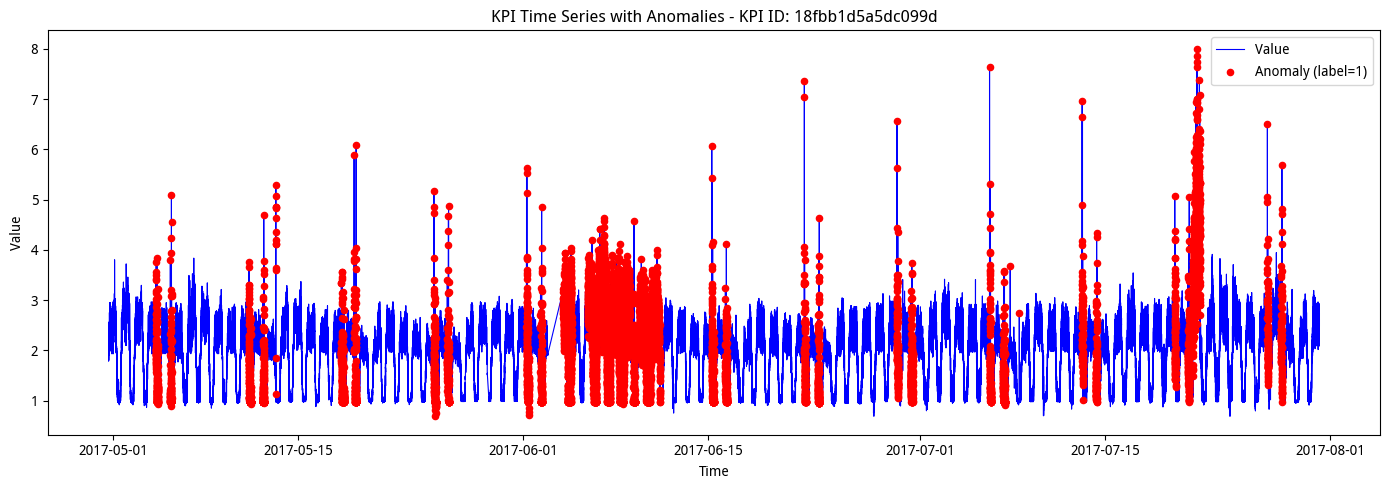

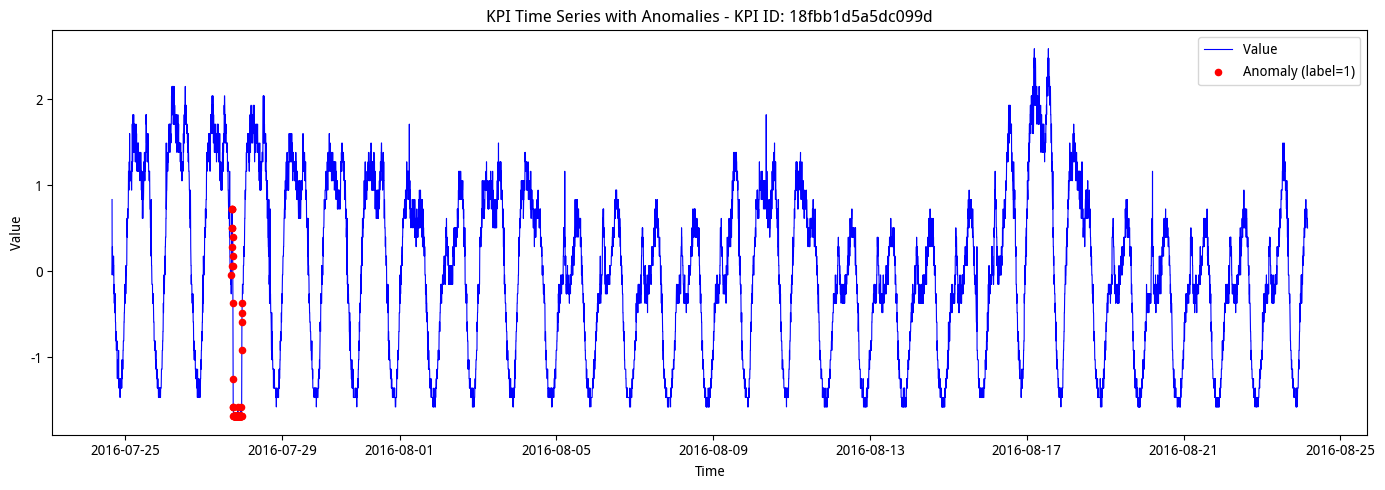

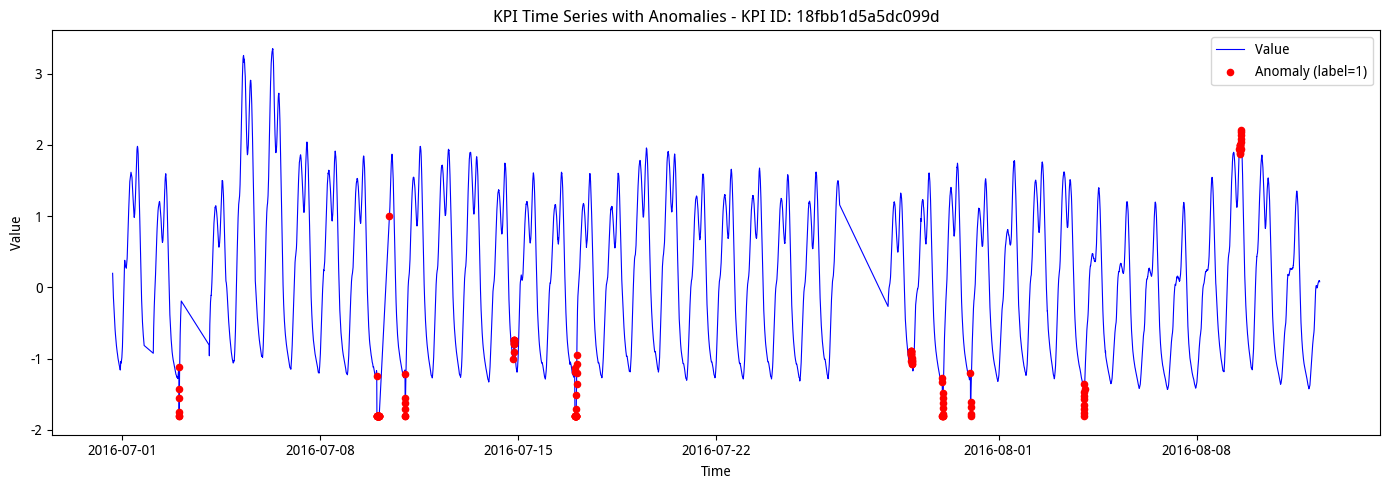

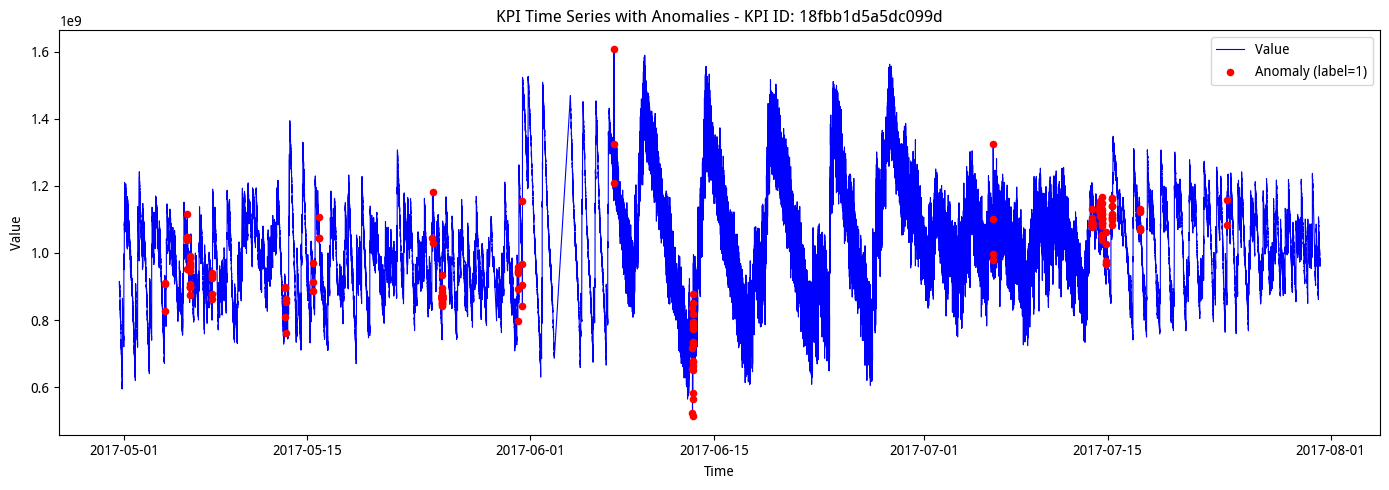

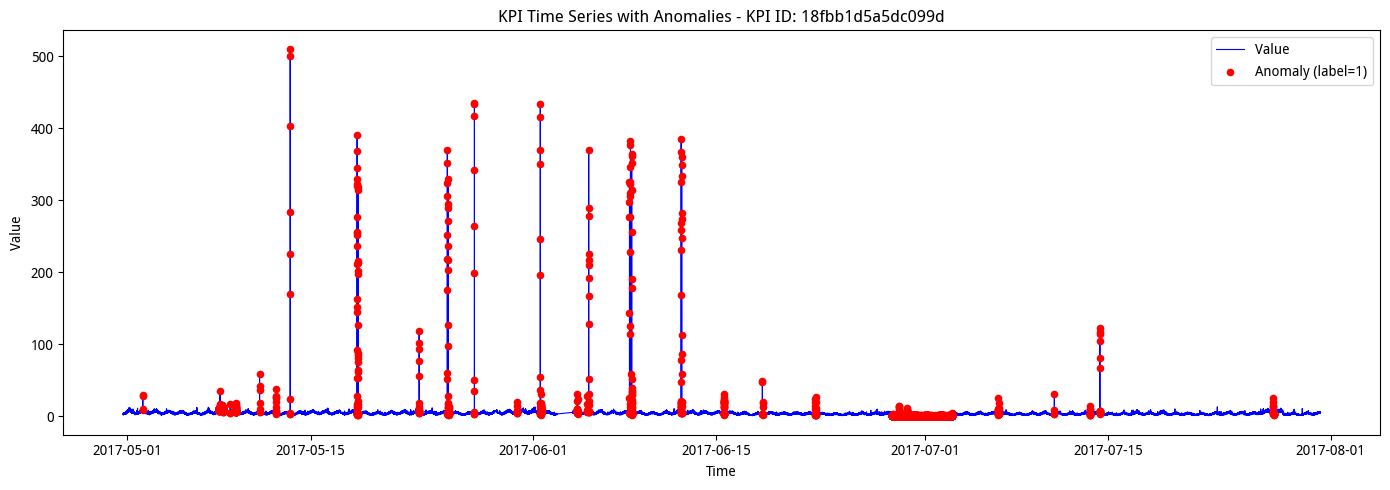

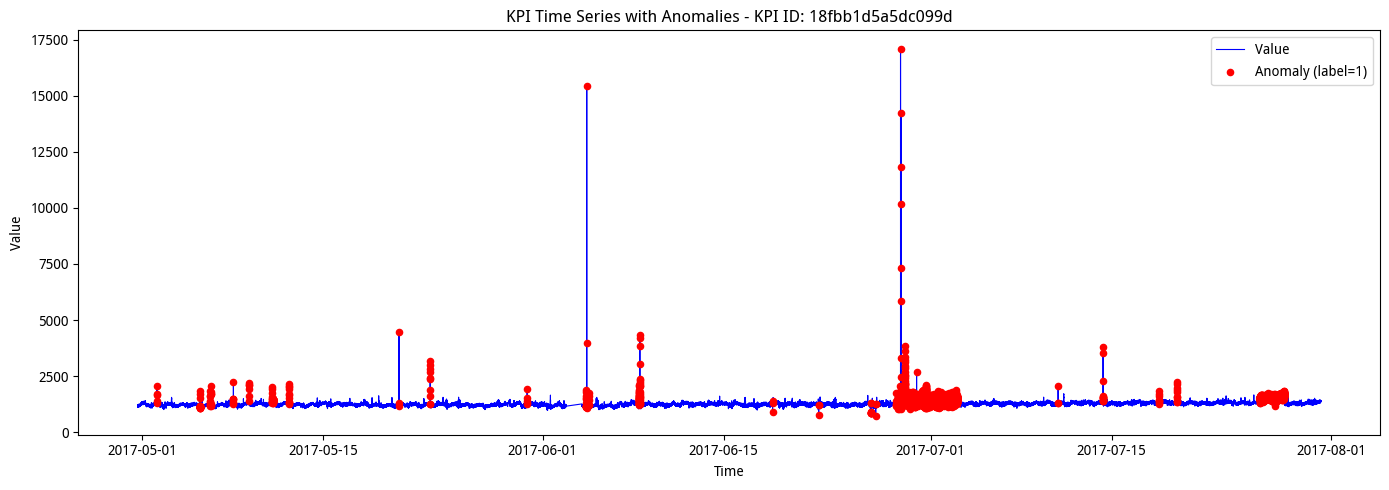

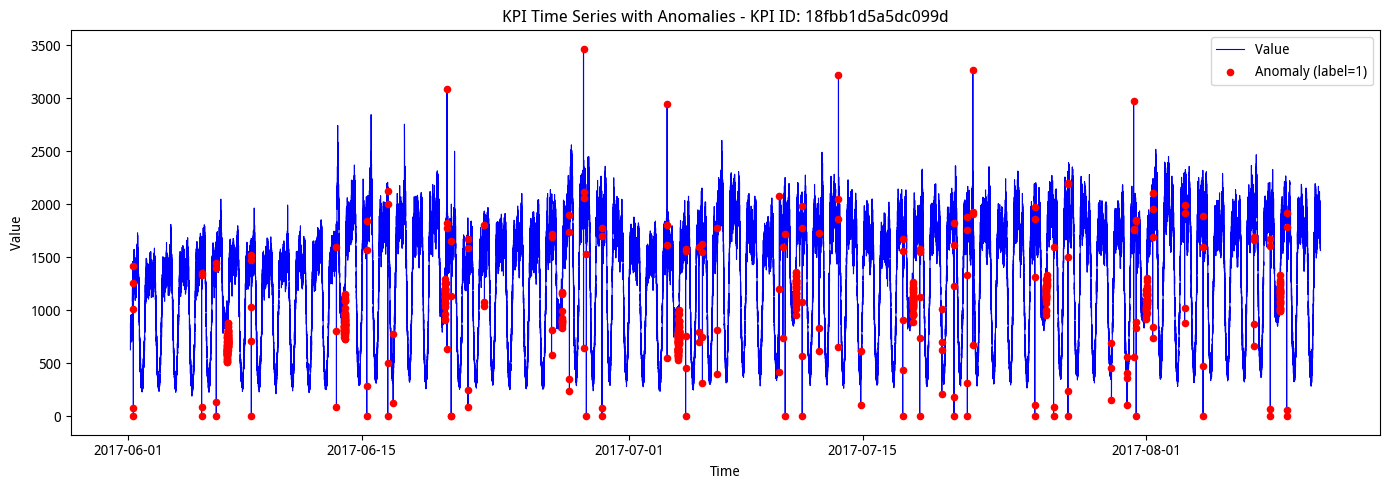

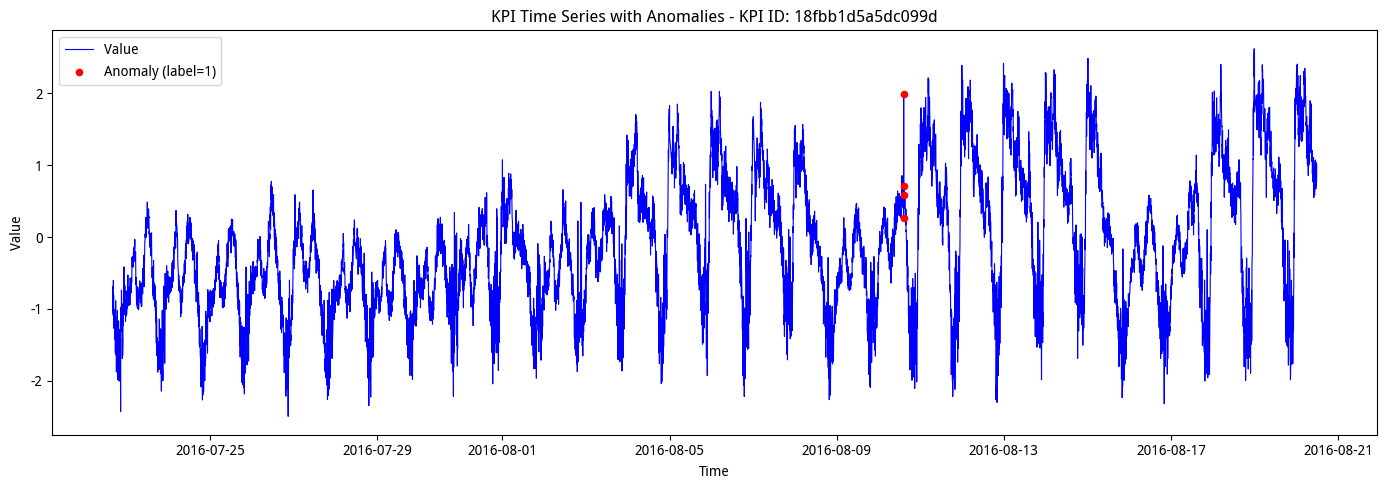

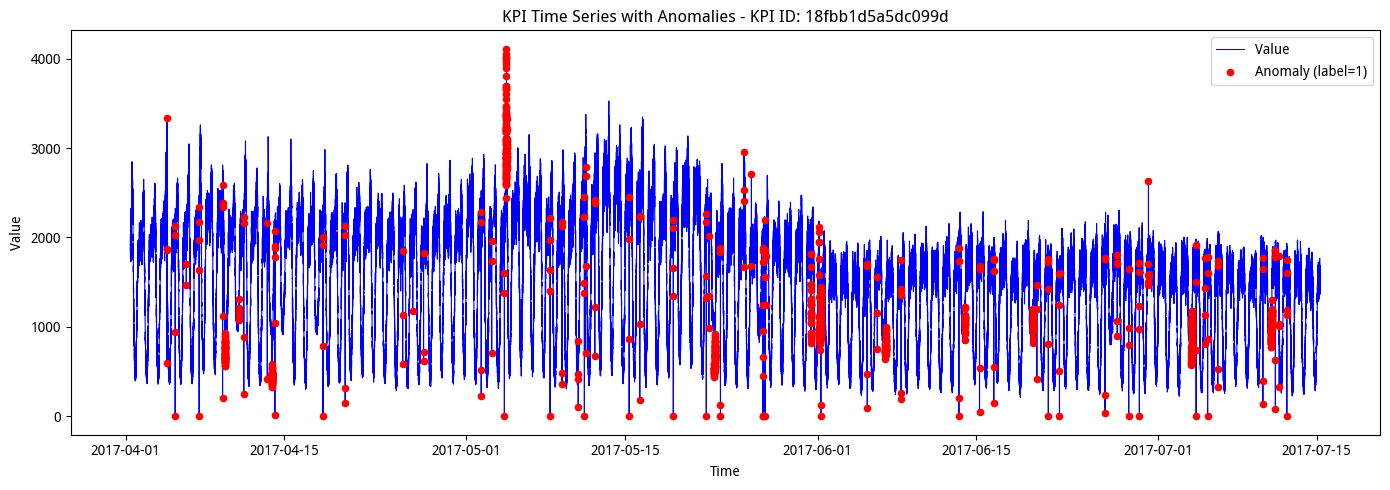

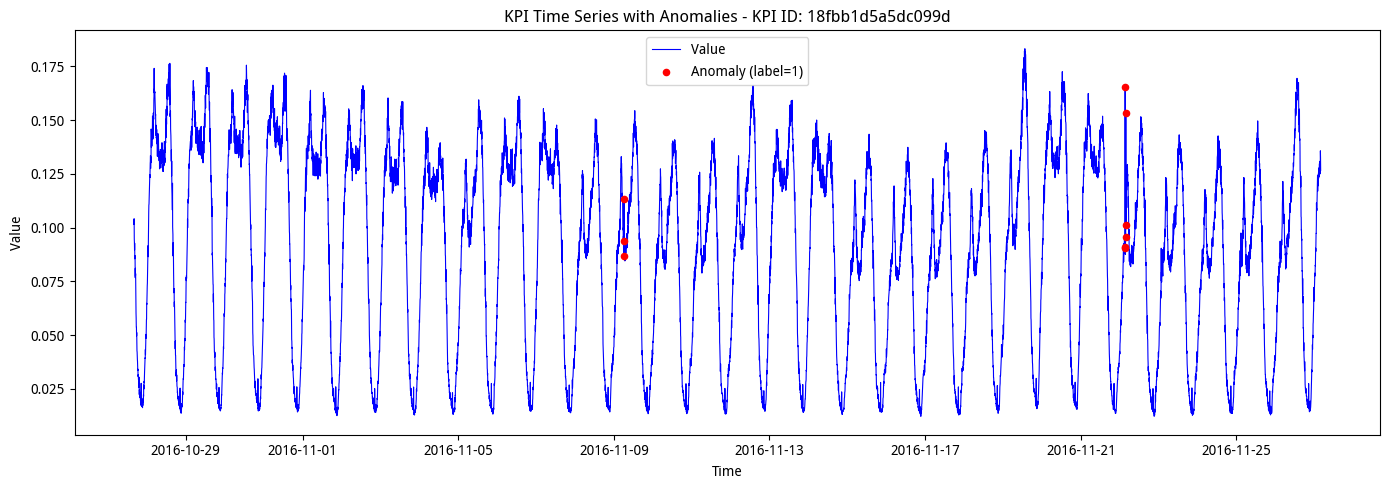

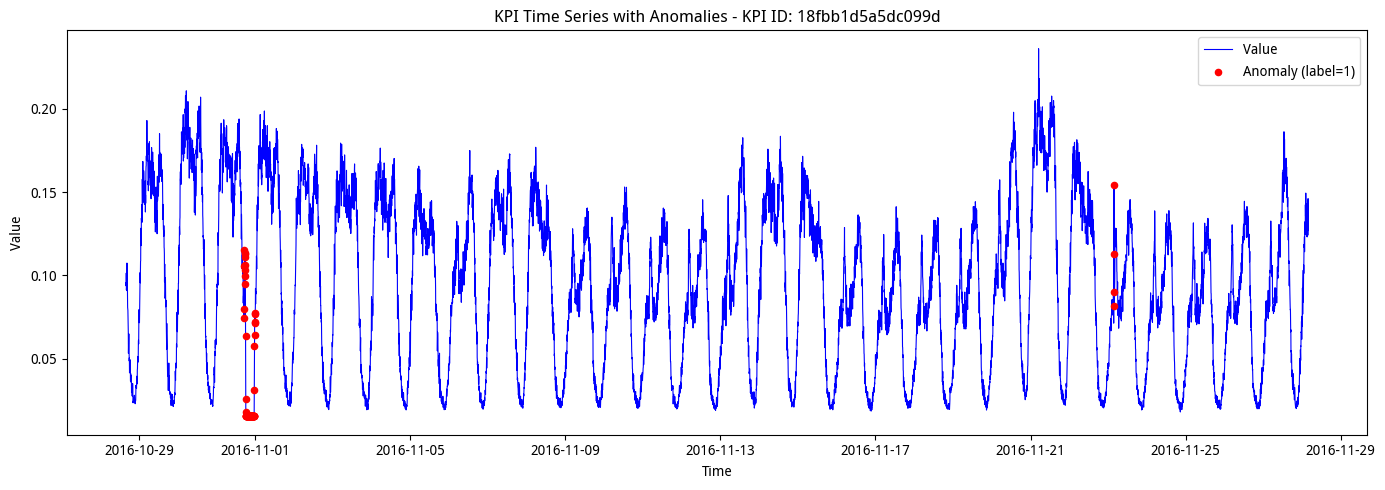

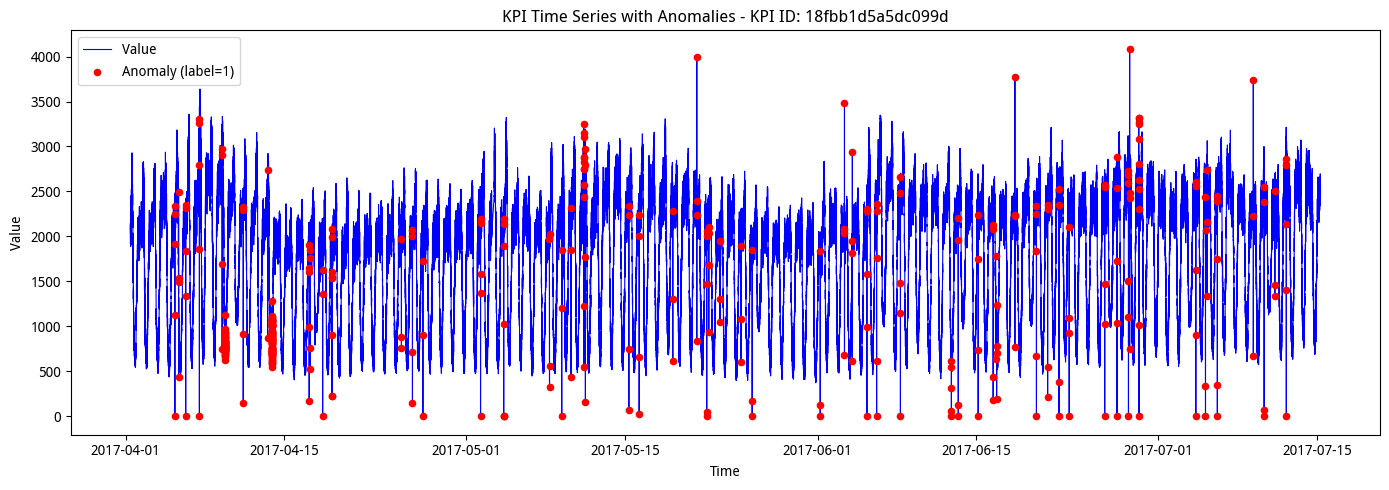

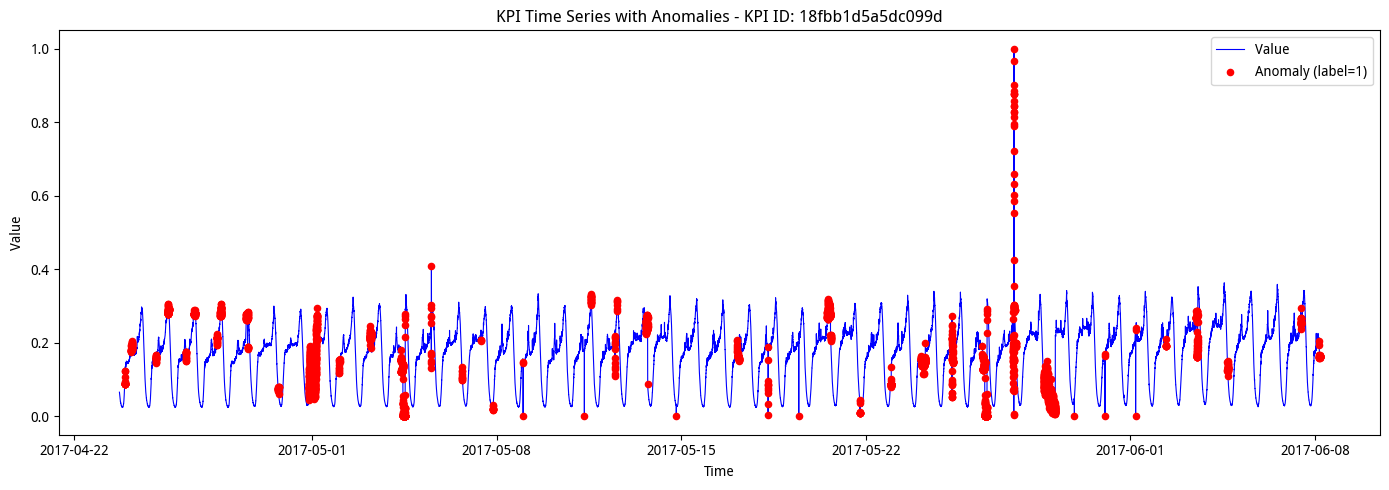

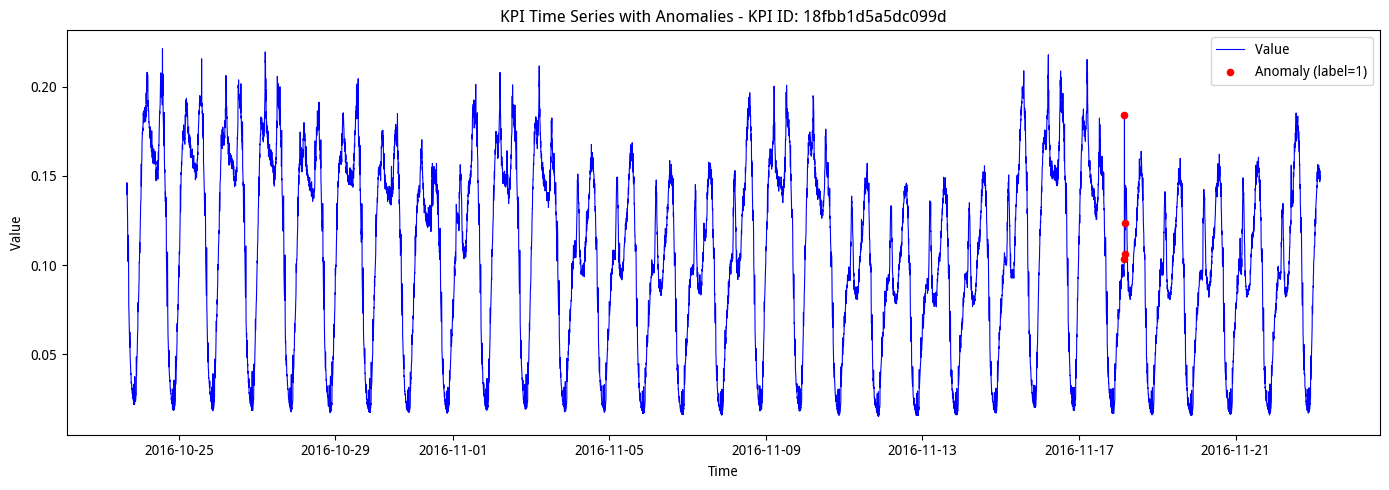

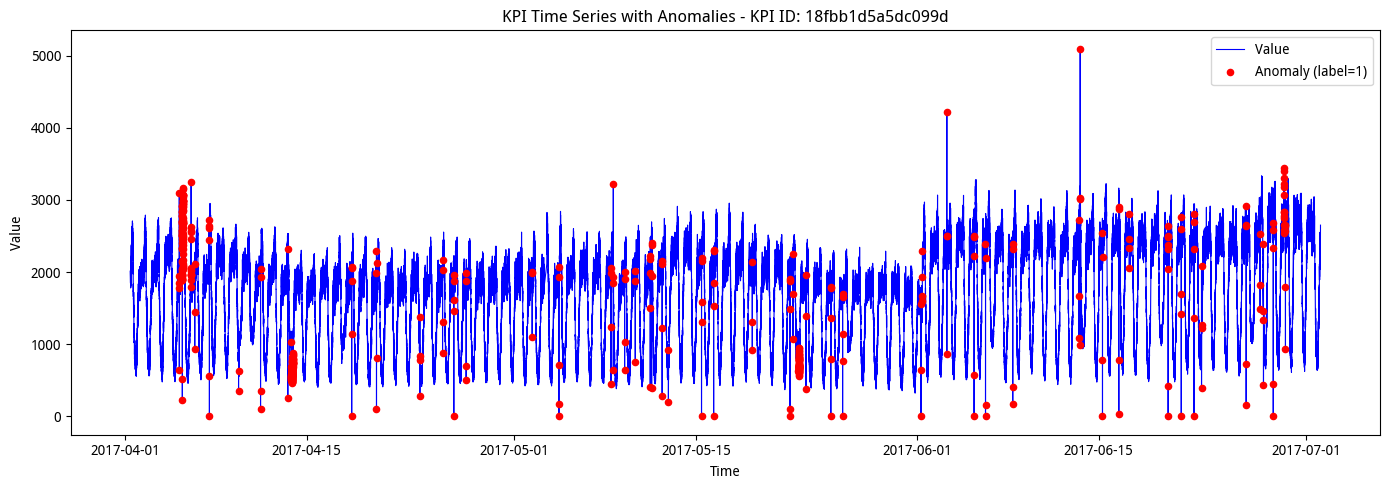

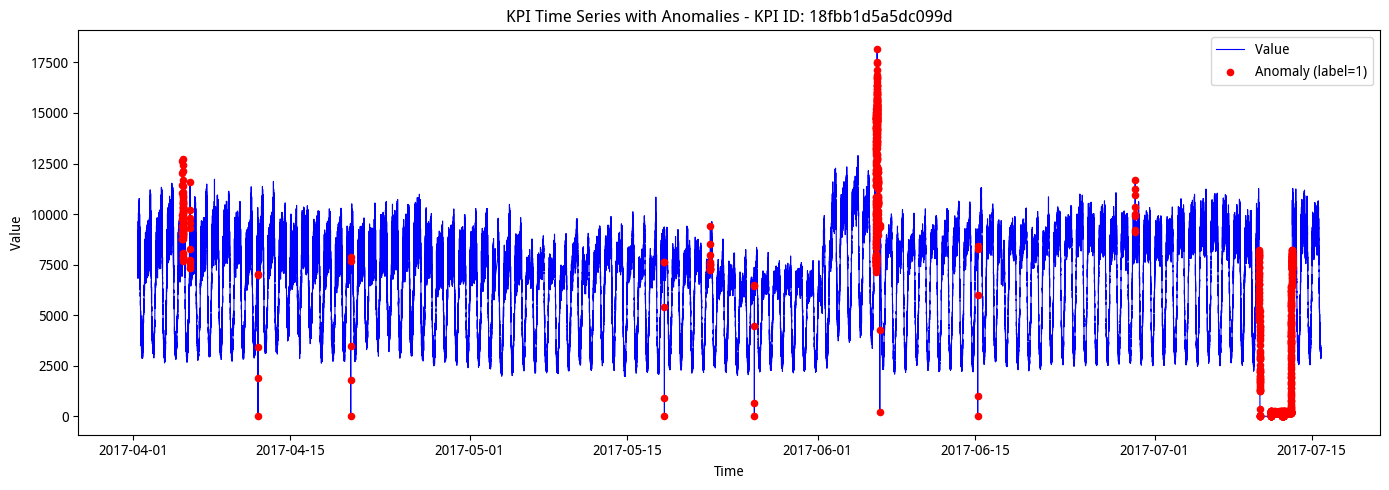

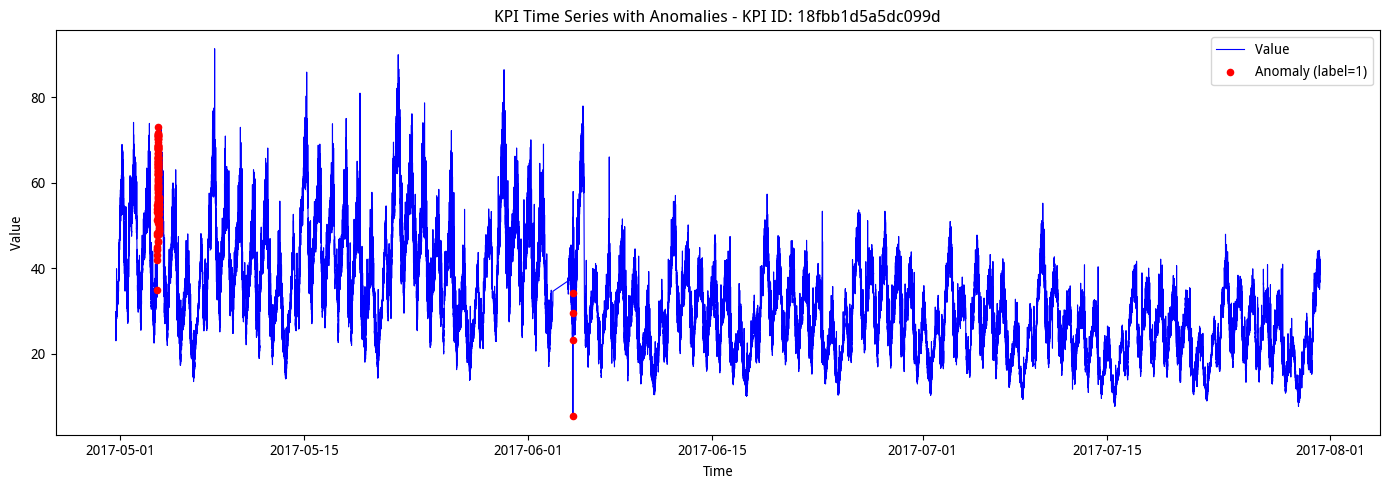

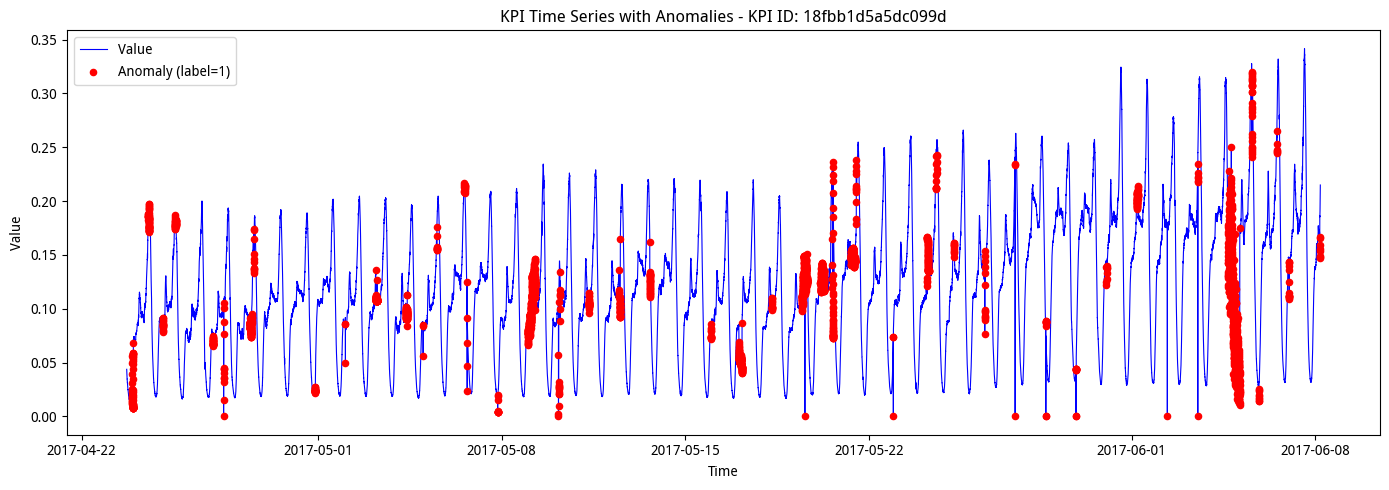

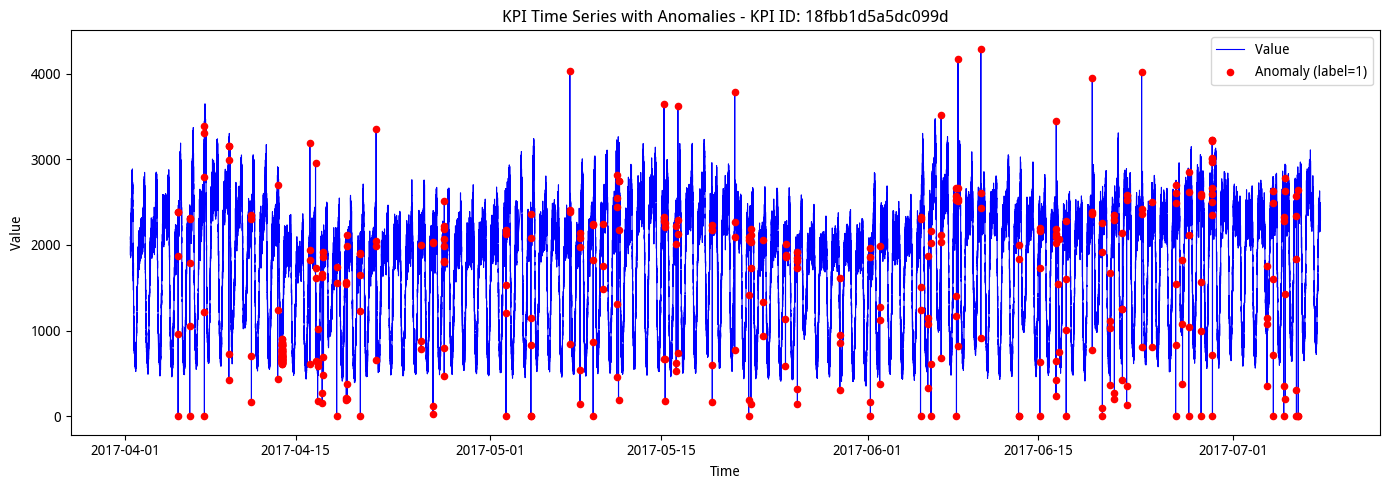

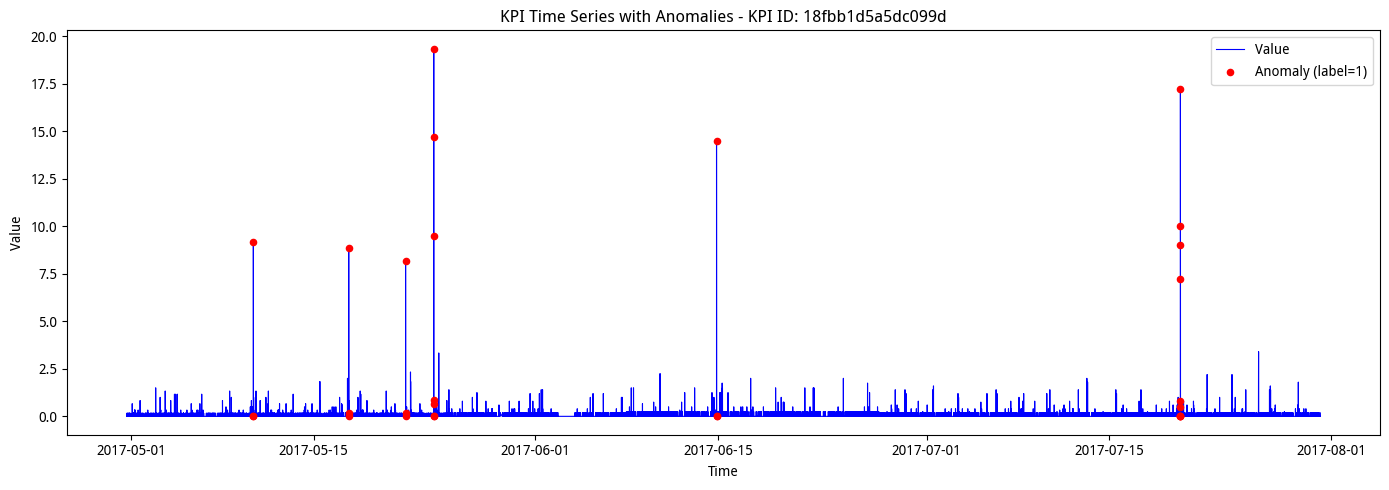

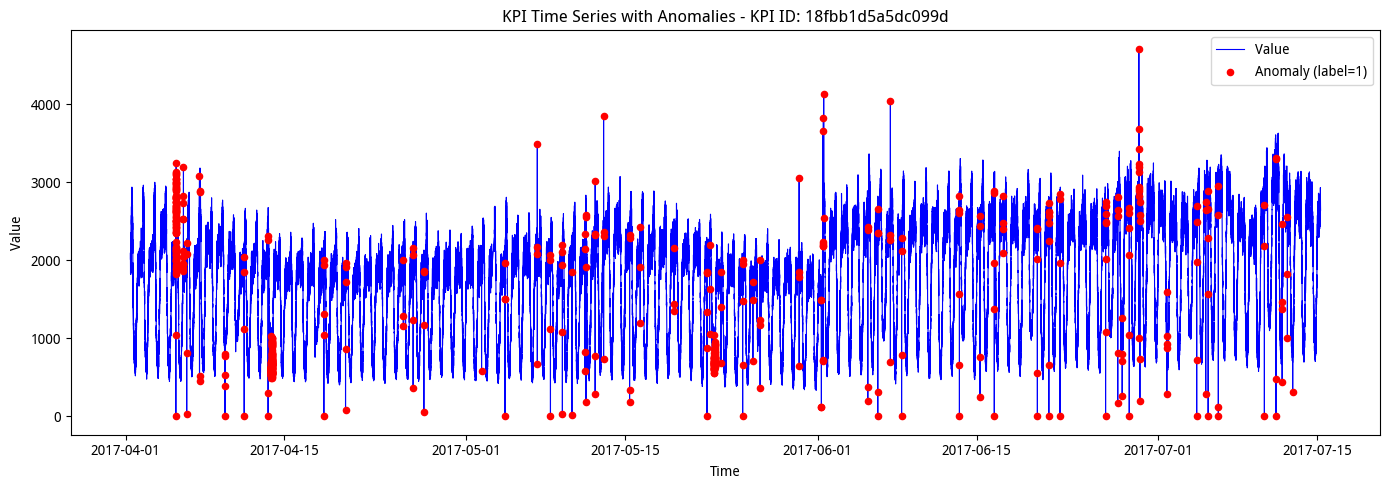

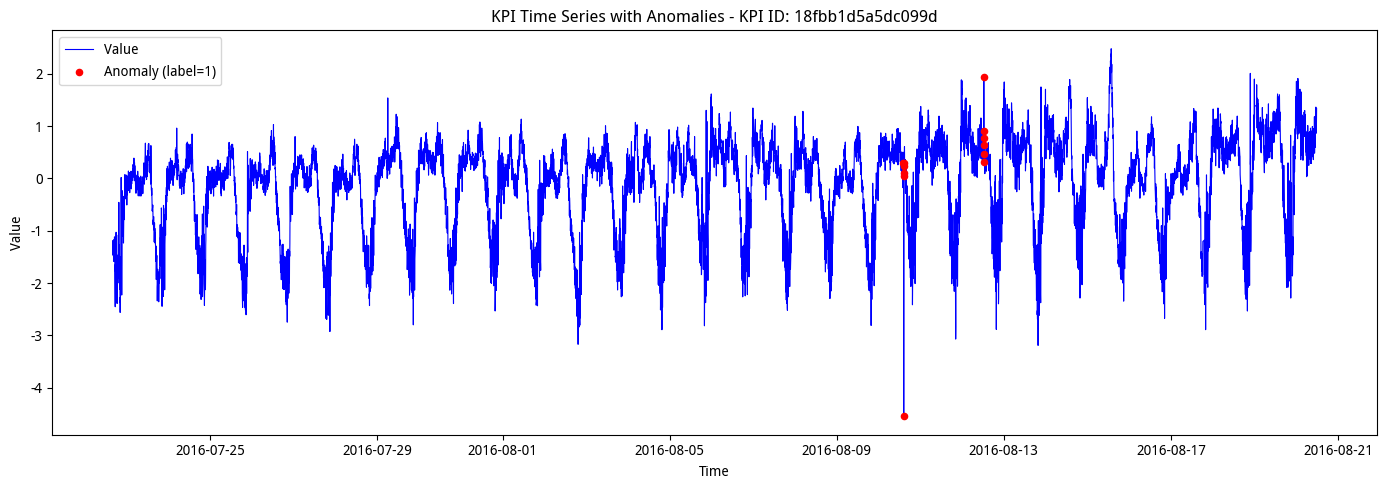

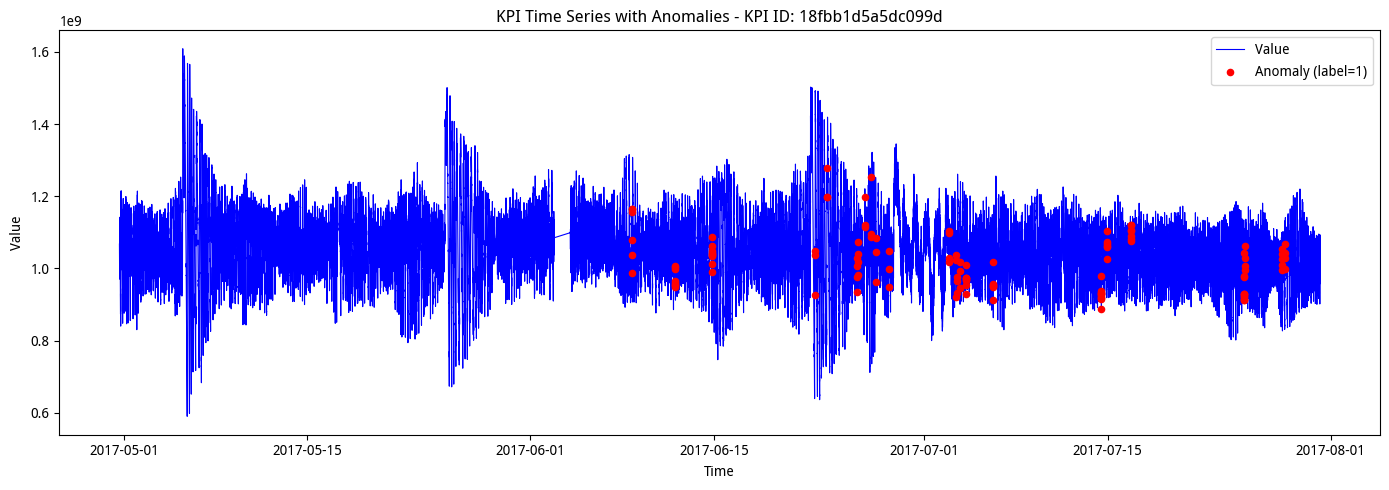

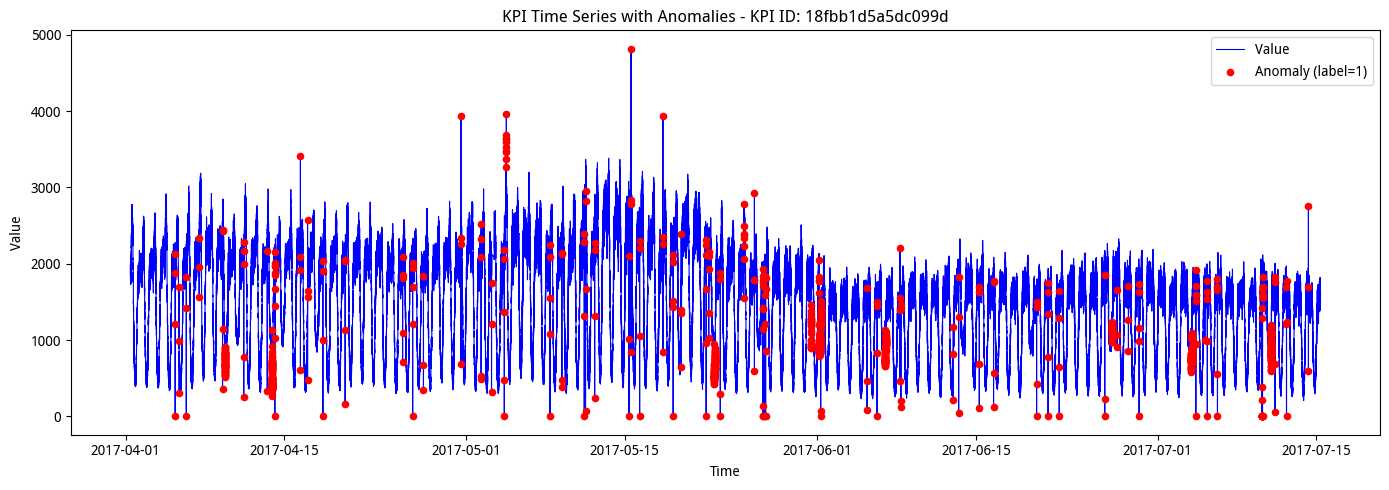

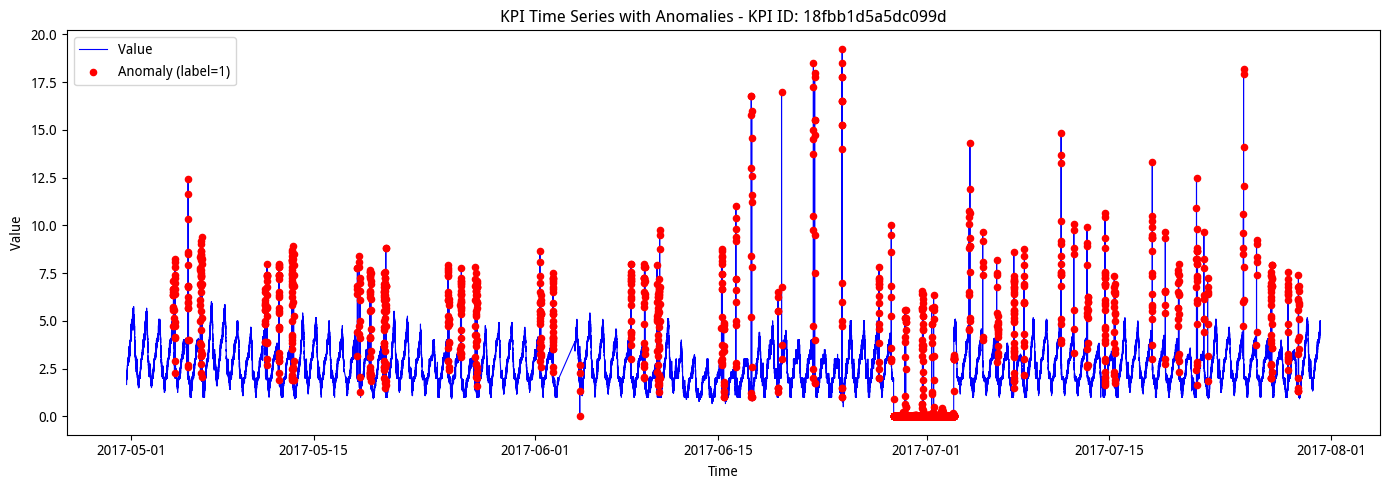

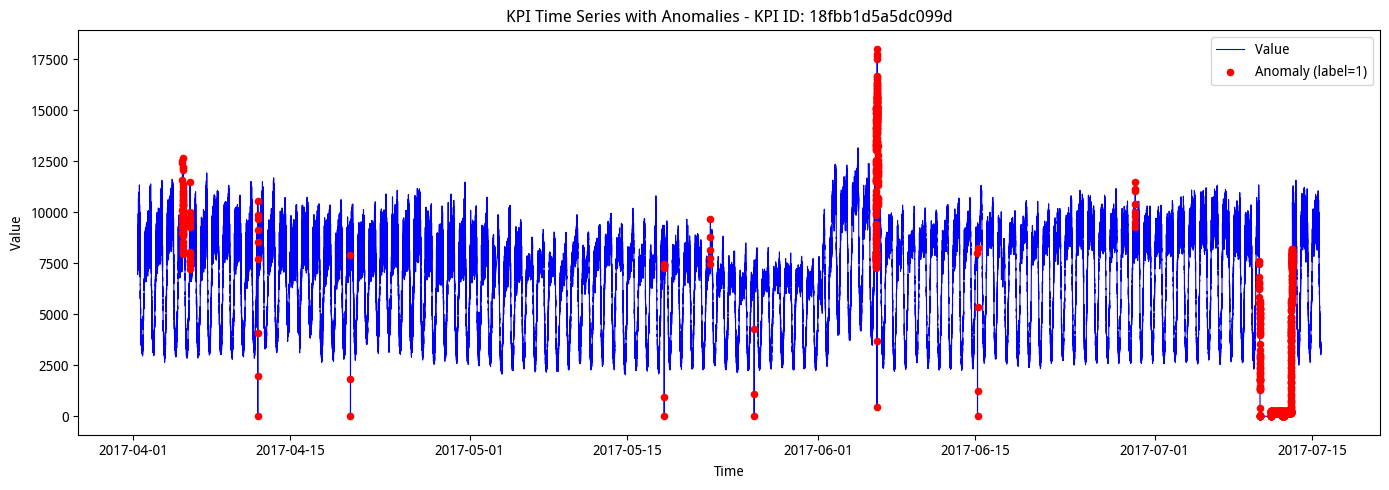

In [15]:
import matplotlib.pyplot as plt

name_dfs = df_train.groupby("KPI ID")
for name, df_kpi in name_dfs:
# 选择一个KPI ID进行展示
#kpi_id = df_train["KPI ID"].unique()
#df_kpi = df_train[df_train["KPI ID"] == kpi_id].copy()

    # 将时间戳转换为日期时间格式
    df_kpi["datetime"] = pd.to_datetime(df_kpi["timestamp"], unit='s')

    # 分离正常点和异常点
    normal = df_kpi[df_kpi["label"] == 0]
    anomaly = df_kpi[df_kpi["label"] == 1]

    # 绘制折线图
    plt.figure(figsize=(14, 5))
    plt.plot(df_kpi["datetime"], df_kpi["value"], label="Value", color="blue", linewidth=0.8)
    plt.scatter(anomaly["datetime"], anomaly["value"], color="red", s=20, label="Anomaly (label=1)", zorder=5)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title(f"KPI Time Series with Anomalies - KPI ID: {kpi_id}")
    plt.legend()
    plt.tight_layout()
    plt.show()

用	18fbb1d5a5dc099d 数据，基于statsmodels/Prophet做时间序列分析

In [23]:
# 安装所需包（如果需要）
# %pip install statsmodels prophet -q

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import numpy as np

# 筛选 KPI ID 为 18fbb1d5a5dc099d 的数据
kpi_id = "18fbb1d5a5dc099d"
df_kpi = df_train[df_train["KPI ID"] == kpi_id].copy()

# 将时间戳转换为日期时间格式并设置为索引
df_kpi["datetime"] = pd.to_datetime(df_kpi["timestamp"], unit='s')
df_kpi = df_kpi.sort_values("datetime")
df_kpi.set_index("datetime", inplace=True)

print(f"数据量: {len(df_kpi)}")
print(f"时间范围: {df_kpi.index.min()} 到 {df_kpi.index.max()}")
print(f"异常点数量: {df_kpi['label'].sum()}")
df_kpi.head()

数据量: 129128
时间范围: 2017-04-30 16:00:00 到 2017-07-31 04:34:00
异常点数量: 7863


,timestamp,value,label,KPI ID
datetime,,,,
2017-04-30 16:00:00,1493568000,2.25,0,18fbb1d5a5dc099d
2017-04-30 16:01:00,1493568060,3.15,0,18fbb1d5a5dc099d
2017-04-30 16:02:00,1493568120,3.05,0,18fbb1d5a5dc099d
2017-04-30 16:03:00,1493568180,3.00,0,18fbb1d5a5dc099d
2017-04-30 16:04:00,1493568240,2.30,0,18fbb1d5a5dc099d


=== ADF 平稳性检验 ===
ADF 统计量: -33.04869881841817
p-value: 0.0
临界值:
  1%: -3.430400670474285
  5%: -2.8615623956113483
  10%: -2.566781920390564
结论: 序列是平稳的 (拒绝原假设)


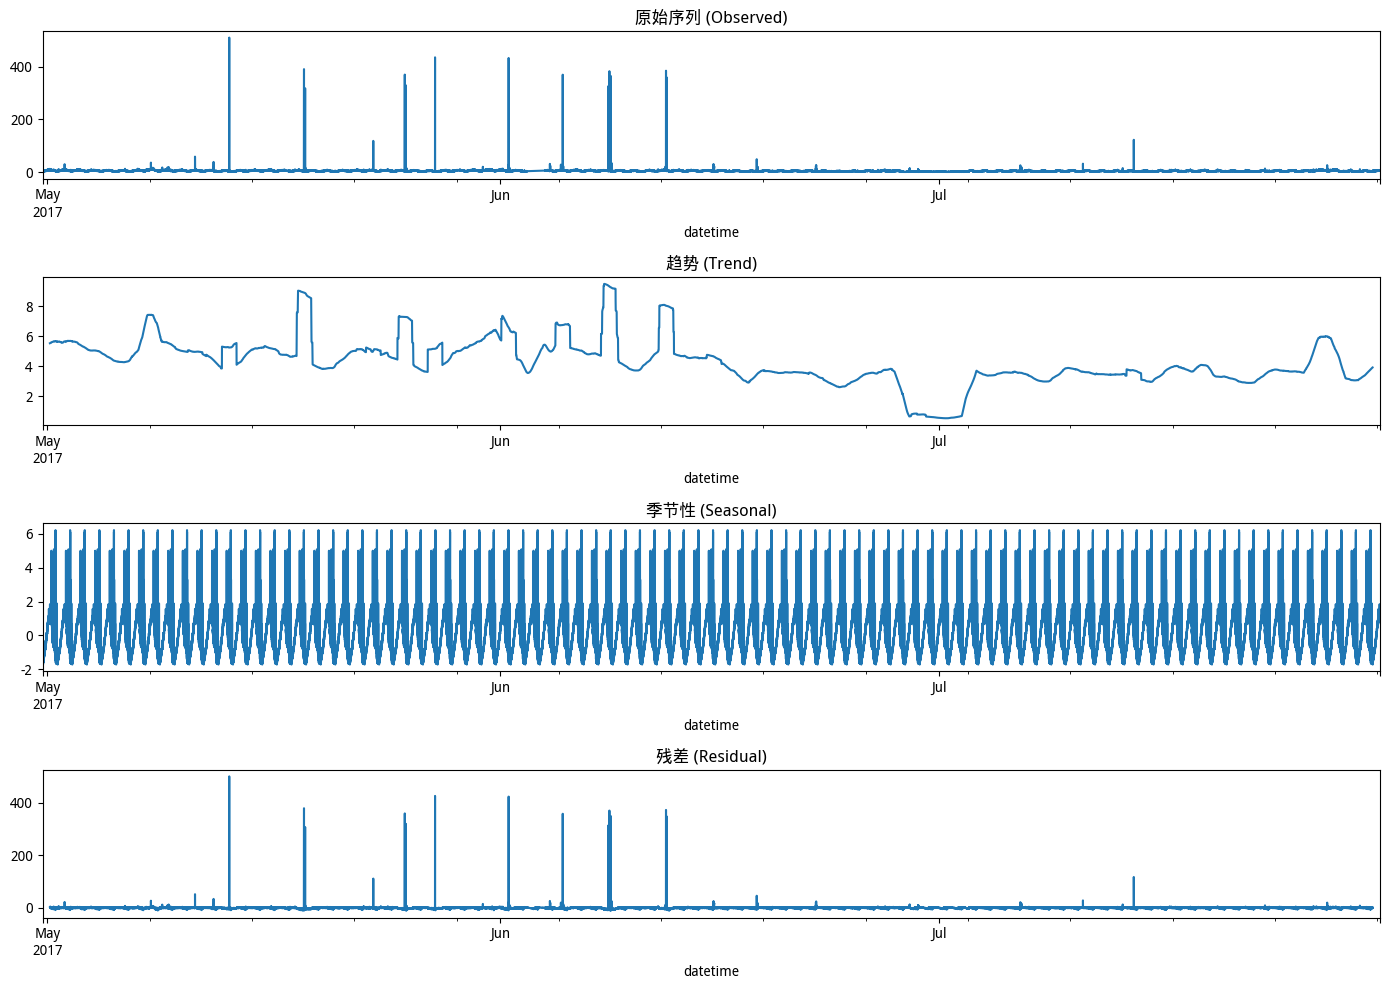

In [21]:

# ADF 平稳性检验
def adf_test(series):
    result = adfuller(series.dropna())
    print("ADF 统计量:", result[0])
    print("p-value:", result[1])
    print("临界值:")
    for key, value in result[4].items():
        print(f"  {key}: {value}")
    if result[1] < 0.05:
        print("结论: 序列是平稳的 (拒绝原假设)")
    else:
        print("结论: 序列是非平稳的 (无法拒绝原假设)")

print("=== ADF 平稳性检验 ===")
adf_test(df_kpi["value"])

# 时间序列分解 (使用 statsmodels)
df_resampled = df_kpi["value"].resample("1min").mean().interpolate()
decomposition = seasonal_decompose(df_resampled, model='additive', period=1440)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))
decomposition.observed.plot(ax=axes[0], title='原始序列 (Observed)')
decomposition.trend.plot(ax=axes[1], title='趋势 (Trend)')
decomposition.seasonal.plot(ax=axes[2], title='季节性 (Seasonal)')
decomposition.resid.plot(ax=axes[3], title='残差 (Residual)')
plt.tight_layout()
plt.show()

In [24]:
# Prophet 时间序列分析
from prophet import Prophet

# 准备 Prophet 所需的数据格式 (ds: 日期, y: 值)
df_prophet = df_kpi.reset_index()[["datetime", "value", "label"]].copy()
df_prophet.columns = ["ds", "y", "label"]

# 划分训练集（仅使用正常数据进行训练）
df_train_prophet = df_prophet[df_prophet["label"] == 0][["ds", "y"]]
print(f"训练集大小 (正常数据): {len(df_train_prophet)}")

# 初始化并训练 Prophet 模型
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False,
    changepoint_prior_scale=0.05,
    interval_width=0.95
)
model.fit(df_train_prophet)

# 对整个数据集进行预测
future = df_prophet[["ds"]]
forecast = model.predict(future)
print("Prophet 模型训练完成!")
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].head()

训练集大小 (正常数据): 121265


20:32:40 - cmdstanpy - INFO - Chain [1] start processing
20:33:27 - cmdstanpy - INFO - Chain [1] done processing


Prophet 模型训练完成!


,ds,yhat,yhat_lower,yhat_upper
0,2017-04-30 16:00:00,4.041277,2.509352,5.620093
1,2017-04-30 16:01:00,4.044337,2.547793,5.531809
2,2017-04-30 16:02:00,4.047441,2.471394,5.710771
3,2017-04-30 16:03:00,4.050588,2.479345,5.600767
4,2017-04-30 16:04:00,4.053777,2.589450,5.596391


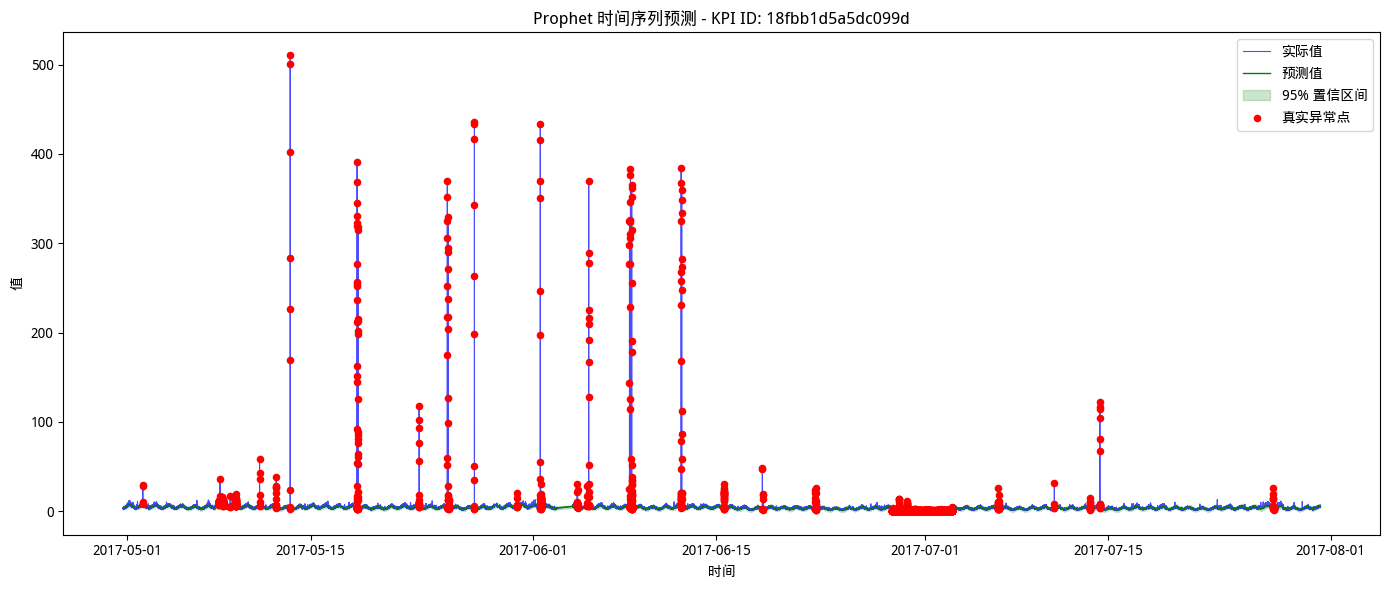

In [19]:
# 可视化 Prophet 预测结果
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df_prophet["ds"], df_prophet["y"], label="实际值", color="blue", alpha=0.7, linewidth=0.8)
ax.plot(forecast["ds"], forecast["yhat"], label="预测值", color="green", linewidth=1)
ax.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], 
                color="green", alpha=0.2, label="95% 置信区间")

anomaly_mask = df_prophet["label"] == 1
ax.scatter(df_prophet.loc[anomaly_mask, "ds"], df_prophet.loc[anomaly_mask, "y"], 
           color="red", s=20, label="真实异常点", zorder=5)

ax.set_xlabel("时间")
ax.set_ylabel("值")
ax.set_title(f"Prophet 时间序列预测 - KPI ID: {kpi_id}")
ax.legend()
plt.tight_layout()
plt.show()

In [20]:
# 基于 Prophet 置信区间的异常检测
from sklearn.metrics import classification_report, confusion_matrix

df_result = df_prophet.copy()
df_result["yhat"] = forecast["yhat"].values
df_result["yhat_lower"] = forecast["yhat_lower"].values
df_result["yhat_upper"] = forecast["yhat_upper"].values

# 预测异常：实际值超出置信区间
df_result["predicted_anomaly"] = ((df_result["y"] < df_result["yhat_lower"]) | 
                                   (df_result["y"] > df_result["yhat_upper"])).astype(int)

print("=== 基于 Prophet 置信区间的异常检测结果 ===")
print(f"真实异常数: {df_result['label'].sum()}")
print(f"预测异常数: {df_result['predicted_anomaly'].sum()}")
print("\n分类报告:")
print(classification_report(df_result["label"], df_result["predicted_anomaly"], target_names=["正常", "异常"]))
print("混淆矩阵:")
print(confusion_matrix(df_result["label"], df_result["predicted_anomaly"]))

=== 基于 Prophet 置信区间的异常检测结果 ===
真实异常数: 7863
预测异常数: 12226

分类报告:
              precision    recall  f1-score   support

          正常       0.99      0.95      0.97    121265
          异常       0.52      0.80      0.63      7863

    accuracy                           0.94    129128
   macro avg       0.75      0.88      0.80    129128
weighted avg       0.96      0.94      0.95    129128

混淆矩阵:
[[115363   5902]
 [  1539   6324]]
